In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
plt.rc("font", size = 14)
sns.set(style = "white")
sns.set(style = "whitegrid", color_codes = True)

C:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url = "https://raw.githubusercontent.com/madmashup/targeted-marketing-predictive-engine/master/banking.csv"

In [3]:
data = pd.read_csv(url)

In [4]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp_var_rate      41188 non-null float64
cons_price_idx    41188 non-null float64
cons_conf_idx     41188 non-null float64
euribor3m         41188 non-null float64
nr_employed       41188 non-null float64
y                 41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

In [6]:
data.isnull()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [8]:
data.isnull().sum().sum()

0

In [9]:
data.dropna().head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [10]:
lst  =  list(data.columns);lst

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed',
 'y']

##### The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories:

In [11]:
data["education"].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [12]:
(data["age"].unique())

array([44, 53, 28, 39, 55, 30, 37, 36, 27, 34, 41, 33, 26, 52, 35, 40, 32,
       49, 38, 47, 46, 29, 54, 42, 72, 48, 43, 56, 31, 24, 68, 59, 50, 45,
       25, 57, 63, 58, 60, 64, 51, 23, 20, 74, 80, 61, 62, 75, 21, 82, 77,
       70, 76, 73, 66, 22, 71, 19, 79, 88, 65, 67, 81, 18, 84, 69, 98, 85,
       83, 78, 92, 86, 94, 17, 91, 89, 87, 95], dtype=int64)

In [13]:
data["age"].nunique()

78

In [14]:
len (data["age"].unique())

78

#### Let us group “basic.4y”, “basic.9y” and “basic.6y” together and call them “basic”.

In [15]:
data["education"]  = np.where(data["education"] == "basic.9y", "basic", data["education"])

In [16]:
data["education"]  = np.where(data["education"] == "basic.6y", "basic", data["education"])

In [17]:
data["education"]   = np.where(data["education"] == "basic.4y", "basic", data["education"])

In [18]:
data["education"].unique()

array(['basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [19]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [20]:
data["y"].count()

41188

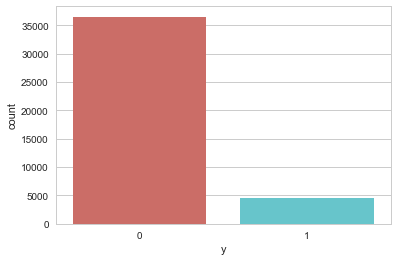

In [21]:
sns.countplot(x = "y", data = data, palette = "hls")


#### Percentage of subscription

In [22]:
count_no_sub  = len(data[data["y"] == 0])
count_sub = len(data[data["y"] == 1])
pect_no_sub = count_no_sub/(count_no_sub + count_sub)
print("percentage of not subscribed:", pect_no_sub*100)
pect_sub = count_sub/(count_no_sub+ count_sub)
print("percentage of subscribe:", pect_sub*100)

percentage of not subscribed: 88.73458288821988
percentage of subscribe: 11.265417111780131


In [23]:
data.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [24]:
data.groupby("job").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [25]:
data.groupby("education").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [26]:
data.groupby("marital").mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


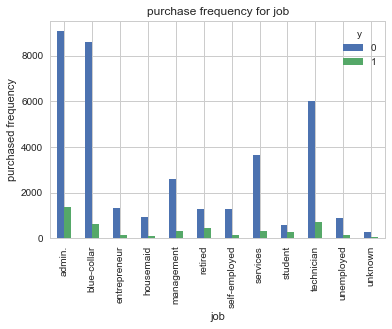

In [27]:
pd.crosstab(data.job, data.y).plot(kind = "bar")
plt.title("purchase frequency for job")
plt.xlabel("job")
plt.ylabel("purchased frequency")
plt.show()

#### The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

Text(0,0.5,'Proportion of Customers')

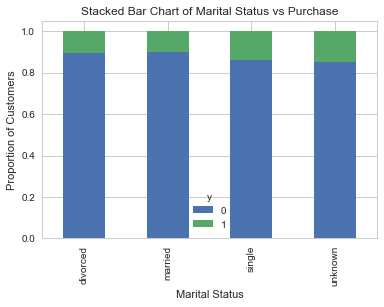

In [28]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

Text(0,0.5,'Proportion of Customers')

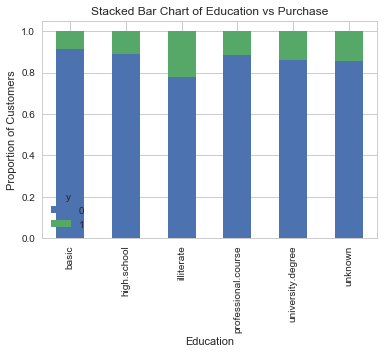

In [29]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')

Text(0,0.5,'purchase')

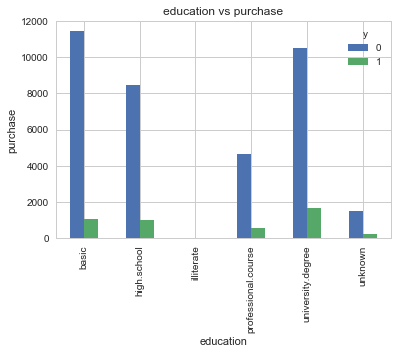

In [30]:
pd.crosstab(data.education, data.y).plot(kind = "bar")
plt.title("education vs purchase")
plt.xlabel("education")
plt.ylabel("purchase")

Text(0,0.5,'Frequency of Purchase')

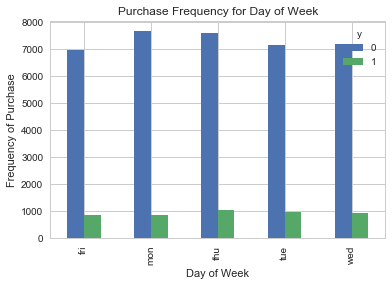

In [31]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')

Text(0,0.5,'purchase')

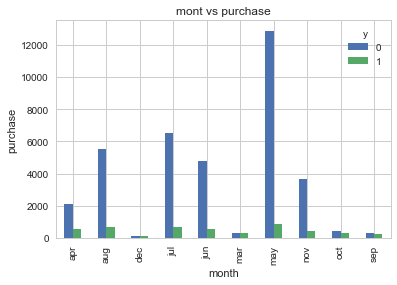

In [32]:
pd.crosstab(data.month, data.y).plot(kind = "bar")
plt.title("mont vs purchase")
plt.xlabel("month")
plt.ylabel("purchase")

Text(0,0.5,'Frequency')

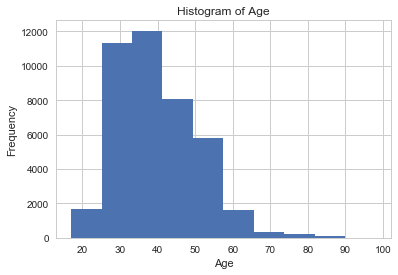

In [33]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

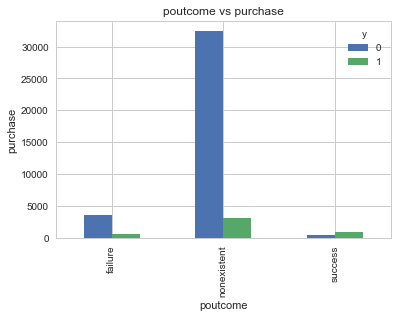

In [34]:
pd.crosstab(data.poutcome, data.y).plot(kind = "bar")
plt.title("poutcome vs purchase")
plt.xlabel("poutcome")
plt.ylabel("purchase")
plt.show()

# Create dummy variables
### That is variables with only two values, zero and one.

In [35]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var])
    data1=data.join(cat_list)
    data=data1
    
cat_vars=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]


ValueError: columns overlap but no suffix specified: Index(['unknown'], dtype='object')

In [ ]:
data_final=data[to_keep]
data_final.columns.values

# program 2

# Logistic Regression
##### Logistic regression is a statistical method for predicting binary classes. The outcome or target variable is dichotomous in nature. Dichotomous means there are only two possible classes. For example, it can be used for cancer detection problems. It computes the probability of an event occurrence.

##### It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. 
##### Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

#### Linear Regression Equation:
            
   #### y = b0 + b1x1.......bnxn
 

##### Where, y is dependent variable and x1, x2 ... and Xn are explanatory variables.

#### Sigmoid Function:
   #### p = 1/ 1+ e^-y


#### Apply Sigmoid function on linear regression:

   ##### p = 1/ 1+ e-(b0 + b1x1....bnxn)


##### Properties of Logistic Regression:

1. The dependent variable in logistic regression follows Bernoulli Distribution
  ###### ( the discrete probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability {q=1-p,} that is, the probability distribution of any single experiment that asks a yes–no question;
  ###### the question results in a boolean-valued outcome, a single bit of information whose value is success/yes/true/one with probability p and failure/no/false/zero with probability q. 
  ###### It can be used to represent a (possibly biased) coin toss where 1 and 0 would represent "heads" and "tails" (or vice versa), respectively, and p would be the probability of the coin landing on heads or tails, respectively. 
 ###### In particular, unfair coins would have {\displaystyle p\neq 1/2.} {\displaystyle p\neq 1/2.}).
#####  
2. Estimation is done through maximum likelihood.
3. No R Square, Model fitness is calculated through 
   1. Concordance(For example , let us consider pair one (1,0), which has the probability as (0.9, 0.6) correspondingly,This means that the probability of 0.9 is considered as event (1) and the probability value of 0.6 is considered as non event(0), in this case.an observation to be classified as an event the cutoff value should be less than 0.9 and more than 0.6,In case of this pair, cutoff value can vary between 0.6 to 0.9.The total number of Concordant pairs are counted and divided by the total number of pairs. This will give us the value of concordance ratio. The higher the concordance ratio, the better is the model.)

   2. KS-Statistics.

#### Linear Regression Vs. Logistic Regression
1.  Linear regression gives you a continuous output, but logistic regression provides a constant output
2. Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach

#### Maximum Likelihood Estimation Vs. Least Square Method
1. The MLE is a "likelihood" maximization method, 
   1.  Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. 
   2. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. 
   3. This set of parameters can be used for predicting the data needed in a normal distribution.

2. Ordinary Least squares (OLS is a distance-minimizing approximation method.)
   1. estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error).
   2. Both are used to estimate the parameters of a linear regression model. 
   3. MLE assumes a joint probability mass function, 
   4. while OLS doesn't require any stochastic assumptions for minimizing distance.

#### Sigmoid Function
###### The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1.
1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. 
2. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and 
3. if it is less than 0.5, we can classify it as 0 or NO.
4. For example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.



#### Types of Logistic Regression

1. Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
2. Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
3. Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

### Let's build the diabetes prediction model.

In [36]:
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(r"C:\Users\karmaveer\Desktop\python 2\Data Set\diabetes.csv", header = None, names = col_names)

In [37]:
list(pima.columns.values)

['pregnant',
 'glucose',
 'bp',
 'skin',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [38]:
list(pima)

['pregnant',
 'glucose',
 'bp',
 'skin',
 'insulin',
 'bmi',
 'pedigree',
 'age',
 'label']

In [41]:
pima.head(2)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1


In [42]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima1 = pd.read_csv(r"C:\Users\karmaveer\Desktop\python 2\Data Set\diabetes.csv", header=None, names=col_names)

In [43]:
pima1.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [44]:
pima = pima1.loc[1:]

In [45]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [46]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 1 to 768
Data columns (total 9 columns):
pregnant    768 non-null object
glucose     768 non-null object
bp          768 non-null object
skin        768 non-null object
insulin     768 non-null object
bmi         768 non-null object
pedigree    768 non-null object
age         768 non-null object
label       768 non-null object
dtypes: object(9)
memory usage: 27.0+ KB


In [47]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
x = pima[feature_cols] # Features
y = pima.label # Target variable

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logreg = LogisticRegression()

In [52]:
logreg.fit(x_test, y_test)
y_pred = logreg.predict(x_test)

In [53]:
len(x_train)

576

In [54]:
len(x_test)

192

### Model Evaluation using Confusion Matrix
###### A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.

In [55]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix  # sum of all arrays value is y_test i.e 231

array([[117,  13],
       [ 29,  33]], dtype=int64)

#### You have two classes 0 and 1. 
1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. 
2. In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ValueError: Colormap rlGnBu is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

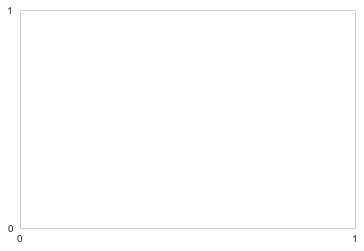

In [57]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="rlGnBu" ,fmt='g') # annot = true means it shows numerics inside the box
#ax.xaxis.set_label_position("top")
#plt.tight_layout()
plt.title('Confusion matrix', y = 1) # y increse the distance between title and imge
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

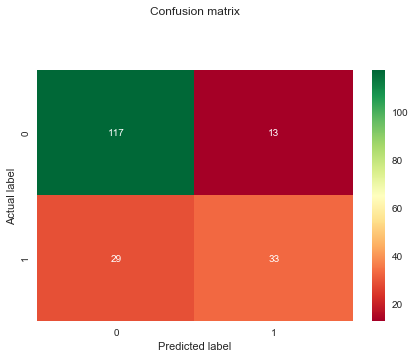

In [58]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="RdYlGn" ,fmt='g') # annot = true means it shows numerics inside the box
                                                                        # cmap shows diff. combinations which are pre define
ax.xaxis.set_label_position("bottom") # label of x axis
ax.yaxis.set_label_position("left")
plt.tight_layout()
plt.title('Confusion matrix', y = 1.2) # y increse the distance between title and imge
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Confusion Matrix Evaluation Metrics
###### Let's evaluate the model using model evaluation metrics such as accuracy, precision, and recall

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.78125


### Precision: Precision is about being precise, i.e., how accurate your model is. In other words, you can say, when a model makes a prediction, how often it is correct. In your prediction case, when your Logistic Regression model predicted patients are going to suffer from diabetes, that patients have 76% of the time.

In [62]:
print("Precision:",metrics.precision_score(y_test, y_pred))


C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['0', '1'], dtype='<U1')

### Recall: If there are patients who have diabetes in the test set and your Logistic Regression model can identify it 58% of the time.



In [63]:
print("Recall:",metrics.recall_score(y_test, y_pred))

C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1030: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if pos_label not in present_labels:


ValueError: pos_label=1 is not a valid label: array(['0', '1'], dtype='<U1')

## ROC Curve
#### Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity

In [65]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: Data is not binary and pos_label is not specified

# program 3

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
 
from sklearn.linear_model import LogisticRegression
from sklearn.externals import joblib

In [69]:
diabetesDF = pd.read_csv(r'C:\Users\karmaveer\Desktop\python 2\Data Set\diabetes (1).csv')
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
diabetesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [72]:
corr = diabetesDF.corr()
corr


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


## brighter colors indicate more correlation

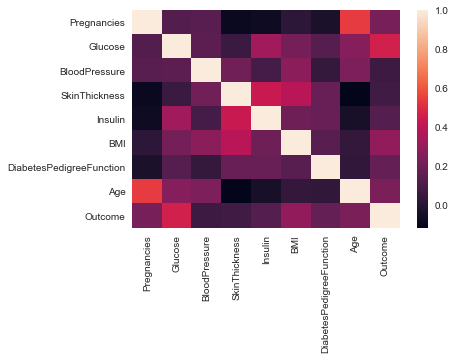

In [73]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [74]:
diabetesDF.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

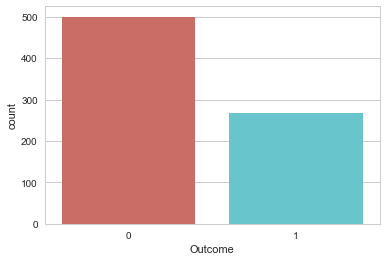

In [77]:
sns.countplot(x = "Outcome", data = diabetesDF, palette = "hls")


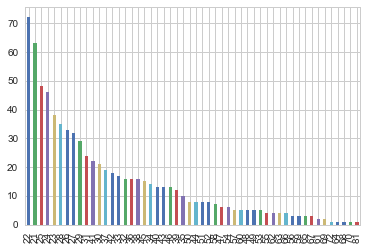

In [107]:
diabetesDF.Age.value_counts().plot(kind = "bar")

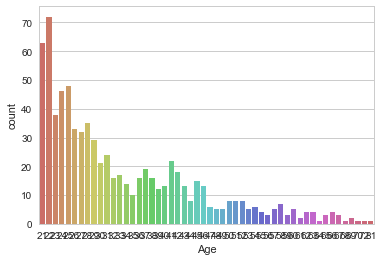

In [85]:
sns.countplot(x = "Age",  data = diabetesDF, palette = "hls")


Text(0,0.5,'age')

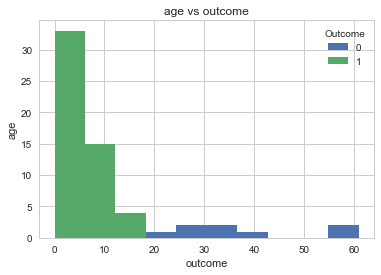

In [86]:
pd.crosstab(diabetesDF.Age, diabetesDF.Outcome).plot(kind = "hist")
plt.title("age vs outcome")
plt.xlabel("outcome")
plt.ylabel("age")

# Dataset preparation (splitting and normalization)

In [87]:
dfTrain = diabetesDF[:650]
dfTest = diabetesDF[650:750]
dfCheck = diabetesDF[750:] 

##### Next, we separate the label and features (for both training and test dataset)

In [88]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))


#### We'll normalize the data such that each variable has a 0 mean and a standard deviation of 1

In [89]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
 
trainData = (trainData - means)/stds
testData = (testData - means)/stds
 
# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

In [93]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [94]:
## Next, we will use our test data to find the accuracy of the model.

accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


### Interpreting the ML model
#### To get a better sense of what is going on inside the logistic regression model, we can visualize how our model uses the different features and which features have greater effect

Text(0.5,0,'Importance')

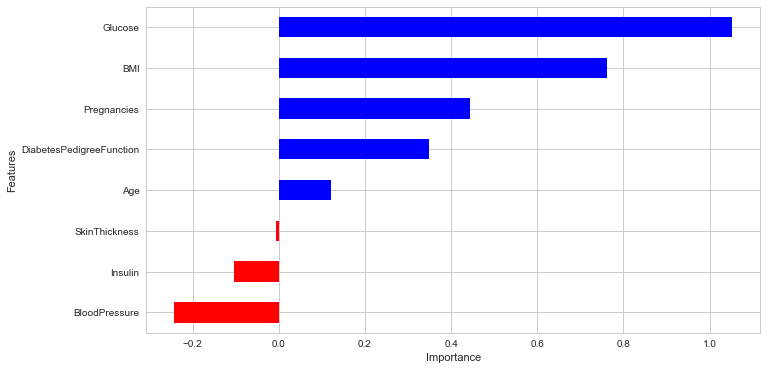

In [95]:
coeff = list(diabetesCheck.coef_[0])
labels = list(dfTrain.drop('Outcome',1).columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

## From the figure above, we can draw the following conclusions:

1. Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!
2. Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).
3. Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.
4. Note that the interpretations above require that our input data be normalized. Without that, we can't claim that importance is proportional to weights.

## Save Model
##### Now we will save our trained model for future use using joblib.

In [96]:
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

['diabeteseModel.pkl']

### To check whether we have saved the model properly or not, we will use our test data to check the accuracy of our saved model (we should observe no change in accuracy if we have saved it properly)

In [97]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

accuracy =  78.0 %


# Predicting using the model
#### We will now use our unused data to see how predictions can be made. We have our unused data in dfCheck.

In [99]:
dfCheck


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
750,4,136,70,0,0,31.2,1.182,22,1
751,1,121,78,39,74,39.0,0.261,28,0
752,3,108,62,24,0,26.0,0.223,25,0
753,0,181,88,44,510,43.3,0.222,26,1
754,8,154,78,32,0,32.4,0.443,45,1
755,1,128,88,39,110,36.5,1.057,37,1
756,7,137,90,41,0,32.0,0.391,39,0
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1


#### We will now use the first record to make our prediction.

In [100]:
sampleData = dfCheck[:1]
 
# prepare sample  
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
 
# predict 
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

Probability: [[0.4385153 0.5614847]]
prediction: [1]


###### The first element of array predictionProbability 0.438 is the probability of the class being 0 and second element 0.561 is the probability of the class being 1.
###### The probability sum up to 1. As we can see that the 1 is more probable class, we get [1] as our prediction, which means that the model predicts that the person has diabetes.